# Proyecto del Visualización Meteorológica: Consulta de Temperaturas Interactivo por Ciudad y Mes

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt

In [2]:
ruta = "C:/Users/Juan/Documents/Practicas de Python/Curso de Python/Python/Día 9/Datos+Meteorológicos_Arg_2023.csv"
df = pd.read_csv(ruta)
df

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9
...,...,...,...,...,...,...,...
1820,31/12/2023,Buenos Aires,15,12,0.0,17.9,49.2
1821,31/12/2023,Cordoba,15,7,0.0,17.8,62.4
1822,31/12/2023,Rosario,14,8,0.0,38.2,31.2
1823,31/12/2023,Mendoza,13,9,84.8,27.6,35.3


In [3]:
df.describe()

,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,17.827945,10.191233,11.469205,24.963945,59.251890
std,8.139477,6.540120,27.714274,8.640341,17.282792
min,2.000000,-3.000000,0.000000,10.000000,30.000000
25%,12.000000,6.000000,0.000000,17.900000,44.400000
50%,17.000000,10.000000,0.000000,24.900000,58.200000
75%,23.000000,15.000000,0.000000,32.300000,74.800000
max,36.000000,22.000000,119.500000,40.000000,90.000000


In [4]:
type(df['Fecha'][0])
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df['Mes'] = df['Fecha'].dt.month

In [5]:
meses = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

In [6]:
def filtrar_por_ciudad(df, ciudad_nombre):
    return df[df['Ciudad'] == ciudad_nombre]

In [7]:
def filtrar_por_mes(df, numero_mes):
    df['Mes'] = df['Fecha'].dt.month
    return df[df['Mes'] == numero_mes]

In [8]:
def marcar_extremos(ax, fechas, temperaturas, color, tipo='max'):
    if tipo == 'max':
        idx = temperaturas.idxmax()
    elif tipo == 'min':
        idx = temperaturas.idxmin()
    else:
        return  # opción inválida

    ax.plot(fechas[idx], temperaturas[idx], 'o', color=color, markersize=15)
    ax.text(fechas[idx], temperaturas[idx] + 1.5, f'{temperaturas[idx]:.1f}°C', 
            ha='center', color=color, fontsize=8)

In [21]:
# --- Bucle de consulta ---
def ejecutar_consulta(df):
    while True:
# Mostrar ciudades disponibles
        ciudades = df['Ciudad'].unique()
        print("Ciudades disponibles:")
        for i, c in enumerate(ciudades, start=1):
            print(f"{i}. {c}")
        
        ciudad_nombre = input("\nEscribe el nombre exacto de la ciudad: ").strip()
        while ciudad_nombre not in ciudades:
            ciudad_nombre = input("Ciudad no válida. Intenta de nuevo: ").strip()
        
# Seleccionar mes
        mes = int(input("Introduce el número del mes (1-12): "))
        while mes < 1 or mes > 12:
            mes = int(input("Mes no válido. Introduce un número entre 1 y 12: "))

# Filtrar primero
        df_filtrado = filtrar_por_ciudad(df, ciudad_nombre)
        df_filtrado = filtrar_por_mes(df_filtrado, mes)

# Crear gráfica de barras
        fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

        ax1 = axs[0]
        ax2 = axs[1]

# Temperatura máxima
        ax1.bar(df_filtrado['Fecha'], df_filtrado['Temperatura Maxima'], color='orange')
        ax1.set_ylim(-5, 40)
        ax1.set_title(f'Temperatura Máxima en {ciudad_nombre} durante el mes de {meses[mes]}')
        ax1.set_xlabel('Fecha')
        ax1.set_ylabel('Temperatura (°C)')
        ax1.tick_params(axis='x', rotation=45)

# Marcar la temperatura máxima
        marcar_extremos(ax1, df_filtrado['Fecha'], df_filtrado['Temperatura Maxima'], 'darkred', tipo='max')

# Temperatura mínima
        ax2.bar(df_filtrado['Fecha'], df_filtrado['Temperatura Minima'], color='skyblue')
        ax2.set_ylim(-5, 40)
        ax2.set_title(f'Temperatura Mínima en {ciudad_nombre} durante el mes de {meses[mes]}')
        ax2.set_xlabel('Fecha')
        ax2.set_ylabel('Temperatura (°C)')
        ax2.tick_params(axis='x', rotation=45)

# Marcar la temperatura mínima
        marcar_extremos(ax2, df_filtrado['Fecha'], df_filtrado['Temperatura Minima'], 'darkblue', tipo='min')

# Ajustar diseño
        plt.tight_layout()
        plt.show()

# Preguntar si desea otra consulta
        respuesta = input("\n¿Deseas realizar otra consulta? (sí/no): ").strip().lower()
        if respuesta not in ['sí', 'si', 's']:
            print("Fin del programa.")
            break

Ciudades disponibles:
1. Buenos Aires
2. Cordoba
3. Rosario
4. Mendoza
5. Tucuman



Escribe el nombre exacto de la ciudad:  Cordoba
Introduce el número del mes (1-12):  8


C:\Users\Juan\AppData\Local\Temp\ipykernel_12692\2950830136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mes'] = df['Fecha'].dt.month


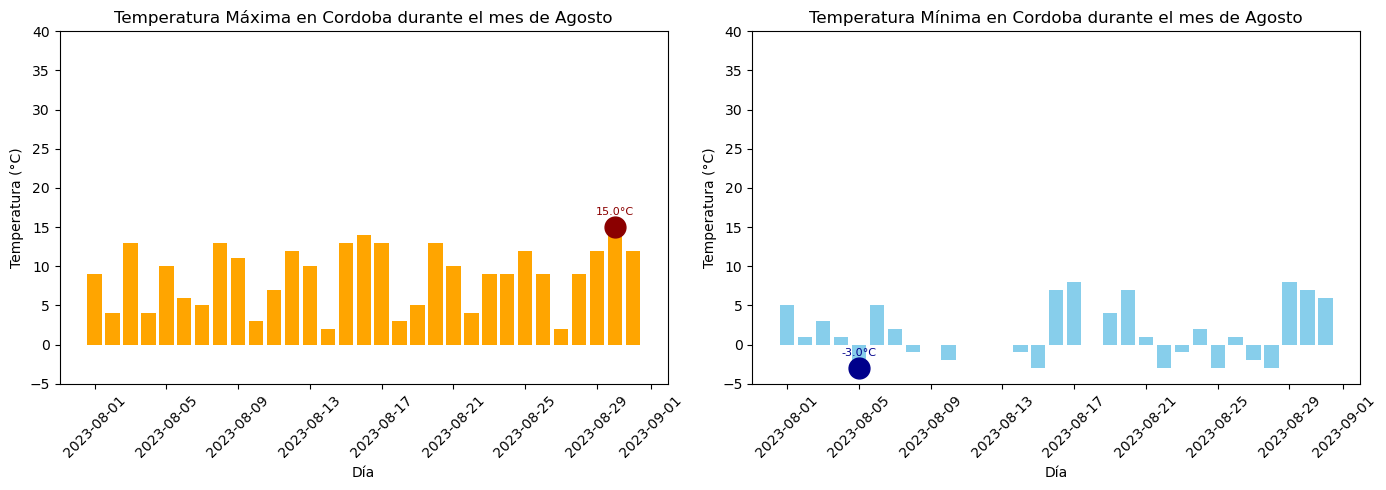


¿Deseas realizar otra consulta? (sí/no):  no


Fin del programa.


In [23]:
ejecutar_consulta(df)